# Predict The World Happiness Through ML

CS 4501 - ML

Vish Panagari & Kat Young

# 1. The Big Picture

What to expect, use and benefit from this model?

What learning algorithm to use?

What performance measure to evaluate?

How much effort to be spent?

# 2. Getting the Data

In [100]:
import pandas as pd
import numpy as np

happiness_df = pd.read_csv("World_Happiness_2017.csv")
happiness_df.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [101]:
# LOOK AT INFO
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
Country                          155 non-null object
Happiness.Rank                   155 non-null int64
Happiness.Score                  155 non-null float64
Whisker.high                     155 non-null float64
Whisker.low                      155 non-null float64
Economy..GDP.per.Capita.         155 non-null float64
Family                           155 non-null float64
Health..Life.Expectancy.         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust..Government.Corruption.    155 non-null float64
Dystopia.Residual                155 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.6+ KB


In [102]:
# Learn basic statistics
happiness_df.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [103]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(happiness_df, test_size=0.2, random_state=42)

train_set.head()


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
96,Bhutan,97,5.011,5.079335,4.942666,0.885416,1.340127,0.495879,0.501538,0.474055,0.173380,1.140184
122,Mauritania,123,4.292,4.377164,4.206836,0.648457,1.272031,0.285349,0.096098,0.201870,0.136957,1.651637
82,Montenegro,83,5.237,5.341044,5.132956,1.121129,1.238376,0.667465,0.194989,0.197911,0.088174,1.729192
109,Bangladesh,110,4.608,4.689822,4.526178,0.586683,0.735132,0.533241,0.478357,0.172255,0.123718,1.978736
65,Estonia,66,5.611,5.688140,5.533860,1.320879,1.476671,0.695168,0.479131,0.098891,0.183249,1.357509


In [104]:
test_set.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
81,Venezuela,82,5.250,5.370032,5.129968,1.128431,1.431338,0.617144,0.153997,0.065020,0.064491,1.789464
142,Benin,143,3.657,3.745784,3.568217,0.431085,0.435300,0.209930,0.425963,0.207948,0.060929,1.885631
31,Thailand,32,6.424,6.509117,6.338883,1.127869,1.425792,0.647239,0.580201,0.572123,0.031613,2.039508
29,Panama,30,6.452,6.557131,6.346870,1.233748,1.373193,0.706156,0.550027,0.210557,0.070984,2.307200
118,Ethiopia,119,4.460,4.542729,4.377271,0.339234,0.864669,0.353410,0.408843,0.312651,0.165456,2.015744


# 3. Exploring and Visualizing the Data

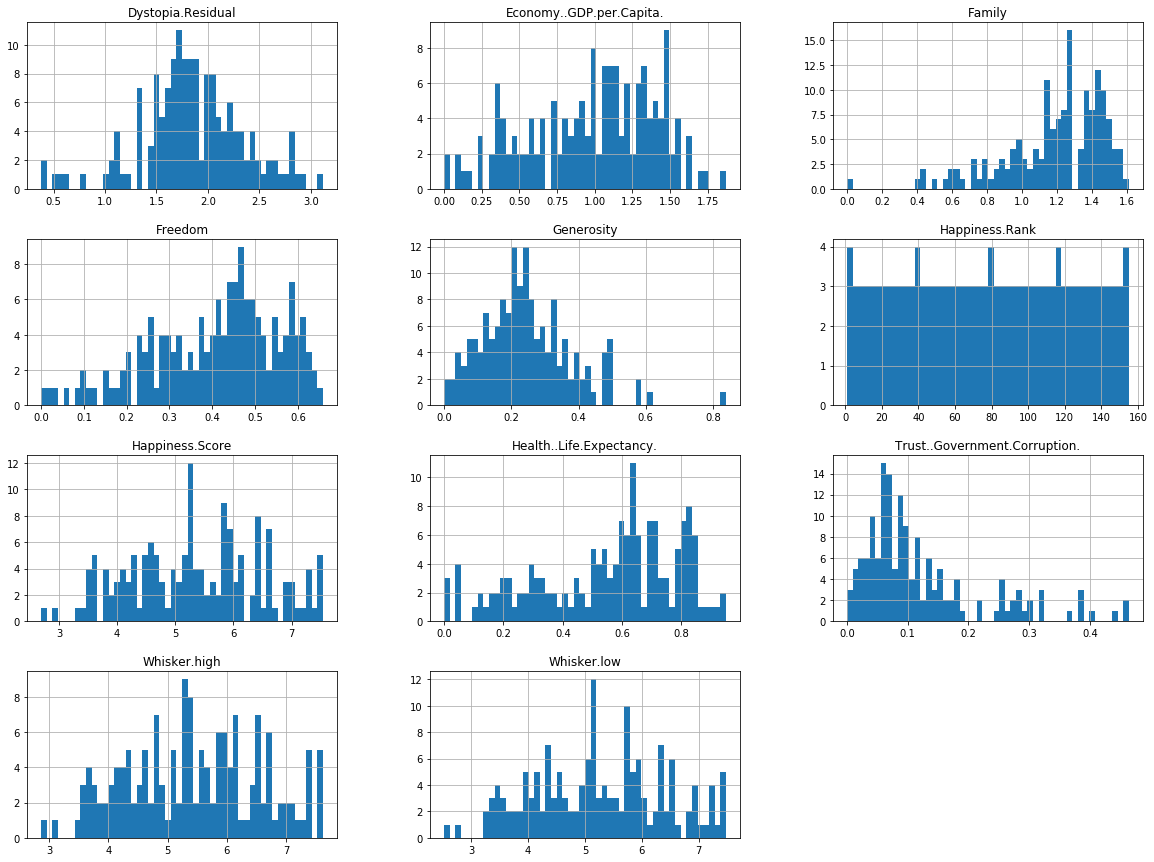

In [105]:
# Look at histograms
%matplotlib inline
import matplotlib.pyplot as plt
happiness_df.hist(bins=50, figsize=(20,15))
#save_fig("attribute_histogram_plots")
plt.show()

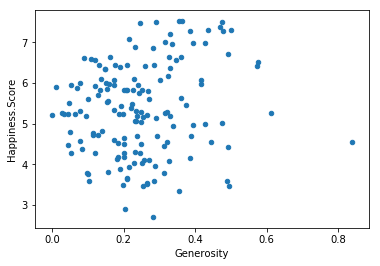

In [141]:
## some scatter plots
happiness_df.plot(kind="scatter",x="Generosity",y="Happiness.Score")

In [107]:
## look at correlations
corr_matrix = happiness_df.corr()
print(corr_matrix)

                               Happiness.Rank  Happiness.Score  Whisker.high  \
Happiness.Rank                       1.000000        -0.992774     -0.993058   
Happiness.Score                     -0.992774         1.000000      0.999497   
Whisker.high                        -0.993058         0.999497      1.000000   
Whisker.low                         -0.991533         0.999520      0.998036   
Economy..GDP.per.Capita.            -0.813244         0.812469      0.811868   
Family                              -0.736753         0.752737      0.750934   
Health..Life.Expectancy.            -0.780716         0.781951      0.776634   
Freedom                             -0.551608         0.570137      0.569907   
Generosity                          -0.132620         0.155256      0.155462   
Trust..Government.Corruption.       -0.405842         0.429080      0.426459   
Dystopia.Residual                   -0.484506         0.475355      0.478824   

                               Whisker.

Along with "Happiness.Score", we selected "Economy..GDP.per.Capita.", "Family", "Health..Life.Expectancy.", and "Freedom" to see visually on scatter plots since each of those attributes had the highest correlations with Happiness Score (0.81, 0.75, 0.78, and 0.57 respectively). 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f14fa90>,
      dtype=object)

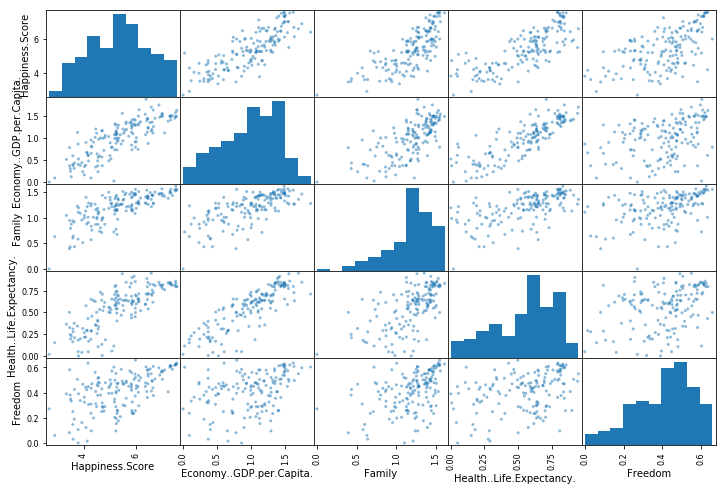

In [108]:
from pandas.plotting import scatter_matrix
attributes = ["Happiness.Score","Economy..GDP.per.Capita.", "Family", "Health..Life.Expectancy.",
              "Freedom"]
scatter_matrix(happiness_df[attributes], figsize=(12, 8))

Most interesting one?!??! **************

# 4. Data Cleaning

In [109]:
# Detect missing values
incomplete_rows = happiness_df[happiness_df.isnull().any(axis=1)].head()
incomplete_rows

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual


There are no "missing values".

In [110]:
happiness_train = train_set.drop(['Country', 'Happiness.Rank', 'Whisker.high', 'Whisker.low','Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual'], axis=1) # drop labels for training set
happiness_test = test_set.drop(['Country', 'Happiness.Rank', 'Whisker.high', 'Whisker.low','Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual'], axis=1) # drop labels for training set


happiness_train.head()

,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom
96,5.011,0.885416,1.340127,0.495879,0.501538
122,4.292,0.648457,1.272031,0.285349,0.096098
82,5.237,1.121129,1.238376,0.667465,0.194989
109,4.608,0.586683,0.735132,0.533241,0.478357
65,5.611,1.320879,1.476671,0.695168,0.479131


In [111]:
happiness_test.head()

,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom
81,5.250,1.128431,1.431338,0.617144,0.153997
142,3.657,0.431085,0.435300,0.209930,0.425963
31,6.424,1.127869,1.425792,0.647239,0.580201
29,6.452,1.233748,1.373193,0.706156,0.550027
118,4.460,0.339234,0.864669,0.353410,0.408843


We dropped the columns for "Country", "Happiness Rank", "Whisker High", and "Whisker Low" because to us, they were restating the Happiness Score in different ways, which we found to be a bit redundant.

Next, we separate the labels to prepare for regression, as well as drop Happiness Score from the training set.

In [112]:
happiness_labels = happiness_train["Happiness.Score"].copy()
happiness_labels.head()

96     5.011
122    4.292
82     5.237
109    4.608
65     5.611
Name: Happiness.Score, dtype: float64

In [113]:
happiness_prepared = happiness_train.drop(['Happiness.Score'], axis=1) # drop labels for training set
happiness_prepared.head()

,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom
96,0.885416,1.340127,0.495879,0.501538
122,0.648457,1.272031,0.285349,0.096098
82,1.121129,1.238376,0.667465,0.194989
109,0.586683,0.735132,0.533241,0.478357
65,1.320879,1.476671,0.695168,0.479131


# 5. Selecting a Model to Train

## Model 1: Linear Regression Model

In [114]:
from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()
lin_reg.fit(happiness_prepared, happiness_labels )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

After we trained our model to the training data, we compared our predicted Happiness Score to the actual scores with RMSE.

In [115]:
from sklearn.metrics import mean_squared_error

happiness_predictions = lin_reg.predict(happiness_prepared)
lin_mse = mean_squared_error(happiness_labels, happiness_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.5172565482763435

## Model 2: Decision Tree Regression

In [116]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(happiness_prepared, happiness_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [117]:
happiness_predictionss = tree_reg.predict(happiness_prepared)
tree_mse = mean_squared_error(happiness_labels, happiness_predictionss)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

The RMSE for the Decision Tree Regression is zero because the model is over-trained to the data. This means there is a chance that the model doesn't fit the test data well.

## Model 3: Random Forest Regression

Train the model to the data.

In [118]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(happiness_prepared, happiness_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

Calculate RMSE.

In [119]:
happiness_prediction = forest_reg.predict(happiness_prepared)
forest_mse = mean_squared_error(happiness_labels, happiness_prediction)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.23715622581250792

The RMSE of the Random Forest Regression is lower than the Linear Regression Model.

## Cross Validation of the models

Now we cross validate each model to see how well each one fits the data best, overall.

In [120]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, happiness_prepared, happiness_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

Cross-Validation of Decision Tree

In [121]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.57568908 0.97269089 0.56590394 0.58727745 0.72320517 0.73719957
 0.46641866 0.53886179 0.45775367 0.79908396]
Mean: 0.6424084181511536
Standard deviation: 0.1543640874996768


Cross-Validation of Linear Regression

In [122]:
lin_scores = cross_val_score(lin_reg, happiness_prepared, happiness_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [0.28748501 0.86402717 0.4658636  0.56226582 0.46481232 0.50961805
 0.35444071 0.59138948 0.53539715 0.58341451]
Mean: 0.5218713819341059
Standard deviation: 0.14731541523776667


Cross-Validation of Random Forest

In [123]:
forest_scores = cross_val_score(forest_reg, happiness_prepared, happiness_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.37899452 0.84872103 0.42126133 0.69611757 0.61598547 0.70762111
 0.38531147 0.46183678 0.53637538 0.65888744]
Mean: 0.5711112102832738
Standard deviation: 0.15102316187035897


# 7. Fine-Tuning

We have selected the Random Forest Regression model moving forward, and are now interested in selecting the best parameters and features.

In [131]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(happiness_prepared, happiness_labels)

/Users/Vish/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [132]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [133]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [134]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005735,0.000846,0.001759,0.000404,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-0.472722,-0.362271,...,-0.403164,0.063625,10,-1.047807e-01,-8.733664e-02,-1.133644e-01,-1.173658e-01,-7.340702e-02,-9.925090e-02,1.653948e-02
1,0.007820,0.000434,0.001421,0.000038,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-0.415830,-0.290820,...,-0.323462,0.079544,4,-5.952062e-02,-5.887622e-02,-6.215261e-02,-6.798787e-02,-5.428317e-02,-6.056410e-02,4.494965e-03
2,0.019835,0.000684,0.002270,0.000024,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-0.428719,-0.277415,...,-0.300482,0.090024,2,-4.727392e-02,-5.524364e-02,-5.798952e-02,-5.642794e-02,-4.951165e-02,-5.328933e-02,4.152544e-03
3,0.003809,0.000595,0.001112,0.000101,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-0.472590,-0.350398,...,-0.376660,0.097841,9,-8.812145e-02,-8.869570e-02,-9.861400e-02,-9.117250e-02,-9.929683e-02,-9.318010e-02,4.830569e-03
4,0.007998,0.000163,0.001395,0.000036,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-0.396673,-0.302975,...,-0.310074,0.074937,3,-5.762329e-02,-7.175430e-02,-6.642386e-02,-6.778639e-02,-5.719847e-02,-6.415726e-02,5.781707e-03
5,0.022846,0.002171,0.002516,0.000258,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-0.398185,-0.282852,...,-0.295593,0.076130,1,-4.539087e-02,-5.415911e-02,-5.880546e-02,-5.787017e-02,-5.034467e-02,-5.331406e-02,4.964310e-03
6,0.003247,0.000035,0.001030,0.000037,2,3,False,"{'bootstrap': False, 'max_features': 2, 'n_est...",-0.410305,-0.318678,...,-0.370859,0.067071,8,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00
7,0.007615,0.000143,0.001405,0.000059,2,10,False,"{'bootstrap': False, 'max_features': 2, 'n_est...",-0.437188,-0.296509,...,-0.339229,0.094413,5,-6.593762e-31,-6.334792e-31,-6.832810e-31,-6.553920e-31,-6.370052e-31,-6.537067e-31,1.787577e-32
8,0.003373,0.000056,0.001036,0.000021,3,3,False,"{'bootstrap': False, 'max_features': 3, 'n_est...",-0.457981,-0.304927,...,-0.367991,0.083172,7,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00
9,0.008136,0.000273,0.001377,0.000030,3,10,False,"{'bootstrap': False, 'max_features': 3, 'n_est...",-0.474336,-0.276805,...,-0.353994,0.088394,6,-6.593762e-31,-6.334792e-31,-6.832810e-31,-6.553920e-31,-6.370052e-31,-6.537067e-31,1.787577e-32


Since we have identified one of the Grid Search combinations to be the best, we make that the final forest model.

In [143]:
randomforest_final = grid_search.best_estimator_

# 8. Evaluate the models

Evaluate each model with the testing set. Begin by preparing the test set and its labels.

In [124]:
happiness_test_labels = happiness_test["Happiness.Score"].copy()
happiness_test_labels.head()

81     5.250
142    3.657
31     6.424
29     6.452
118    4.460
Name: Happiness.Score, dtype: float64

In [125]:
happiness_test_prepared = happiness_test.drop(['Happiness.Score'], axis=1) # drop labels for test set
happiness_test_prepared.head()

,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom
81,1.128431,1.431338,0.617144,0.153997
142,0.431085,0.435300,0.209930,0.425963
31,1.127869,1.425792,0.647239,0.580201
29,1.233748,1.373193,0.706156,0.550027
118,0.339234,0.864669,0.353410,0.408843


## Model 1: Linear Regression Model

Run the test data through the Linear Regression Model

In [127]:
happiness_test_predictions = lin_reg.predict(happiness_test_prepared)
lin_mse = mean_squared_error(happiness_test_labels, happiness_test_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.41875606803563736

## Model 2: Decision Tree Regression

In [128]:
happiness_test_predictionss = tree_reg.predict(happiness_test_prepared)
tree_mse = mean_squared_error(happiness_test_labels, happiness_test_predictionss)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.6602087211429659

## Model 3: Random Forest Regression

In [137]:
happiness_test_prediction = randomforest_final.predict(happiness_test_prepared)
forest_mse = mean_squared_error(happiness_test_labels, happiness_test_prediction)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.4752208818291083

### Calculate the 95% confidence interval of the error

In [139]:
from scipy import stats
confidence = 0.95
squared_errors = (happiness_test_prediction - happiness_test_labels) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

array([0.32349665, 0.58908377])

### Graph the predicted vs actual happines score

For the linear model:

Text(0.5, 1.0, 'Predictions (black) on Real World Happiness Scores from 2017 (green)')

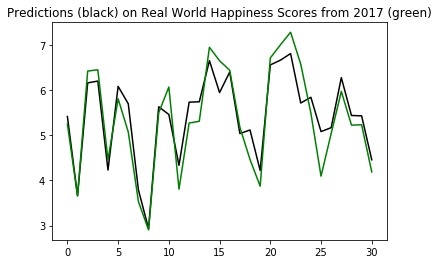

In [144]:
pred_arr = np.array(happiness_test_predictions)
act_arr = np.array(happiness_test_labels)
plt.plot(pred_arr, color="Black")
plt.plot(act_arr, color="Green")
plt.title("Predictions (black) on Real World Happiness Scores from 2017 (green)")

For the Random Forest Model:

Text(0.5, 1.0, 'Predictions (red) on Real World Happiness Scores from 2017 (green)')

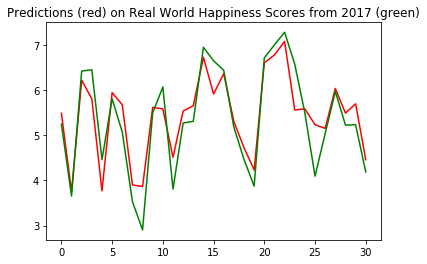

In [145]:
pred_arr = np.array(happiness_test_prediction)
act_arr = np.array(happiness_test_labels)
plt.plot(pred_arr, color="red")
plt.plot(act_arr, color="Green")
plt.title("Predictions (red) on Real World Happiness Scores from 2017 (green)")